<a href="https://colab.research.google.com/github/LasinduChamika/Backend/blob/main/2_MLpipeline_w5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<br><br>
<p style="font-size:24px; color:#216594;text-align:center;">
Applied AI in Chemical and Process Engineering
</p>

<p style="font-size:30px; color:black;text-align:center;">
    Bulding ML pipeline for Reactor data
</p>


‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà
<br>


**Week 3-4**

This notebook will build a pipeline to prepare data and develop an ML algorithm


# Content

**Part 1: Data Preprocessing & Exploration**

| Step                  | Description                                                                 | Key Actions & Tools                                                                                     |
|-----------------------|-----------------------------------------------------------------------------|---------------------------------------------------------------------------------------------------------|
| **Data Preparation**  | Gather, load, and inspect raw data                                          | - Load dataset (e.g., CSV, DB)<br>- Check data types, shape, initial samples (`df.head()`, `df.info()`) |
| **Data Cleaning**     | Fix issues in data quality                                                  | - Handle missing values (impute or drop)<br>- Remove duplicates<br>- Detect and treat outliers (IQR, Z-score) |
| **Exploratory Data Analysis (EDA)** | Understand data distributions and relationships                   | - Visualizations: histograms, scatter plots, pair plots<br>- Correlation matrix (heatmaps)<br>- Summary statistics |

**Part 2: Modeling & Interpretation**

| Step                                  | Description                                                                 | Key Actions & Tools                                                                                     |
|---------------------------------------|-----------------------------------------------------------------------------|---------------------------------------------------------------------------------------------------------|
| **Normalization (Principle Only)**    | Scale features to same range (e.g., for distance-based models)              | - Apply Min-Max Scaling or Standardization<br>- Justify choice based on model needs (e.g., SVM, KNN, Neural Networks) |
| **Model Training, Validation & Testing** | Build and evaluate model performance                                    | - Split data: `train_test_split`<br>- Train models (e.g., Linear Regression, Random Forest, XGBoost)<br>- Use cross-validation<br>- Evaluate using metrics (RMSE, MAE, R¬≤, etc.) |
| **Model Explanation with XAI**        | Interpret model predictions and feature importance                          | - Use SHAP, LIME, or feature importance plots<br>- Explain predictions to stakeholders<br>- Ensure transparency and trust |

**Note:** Since our example does not have categorical data, we do not encode variables - which is essential if the data is categorical

# Ethanol Production - Sugar Industry

![Process Flow Diagram](./assets/etoh_flowdiagram.png)


**Our goal is to model residual sugar. The model can be later used to optimize the fermentation process**

**Data**
- Temperature ¬∞C: Fermentation tank
- pH: Fermentation tank
- Yeast Concentration g/L: Fermentation tank
- Sugar Concentration w/v: Dilution tank (input for fermenation)
- Residual Sugar g/L: Post-fermentation


Note: The data is simualted data


In [26]:
# Load all the libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error
from xgboost import XGBRegressor

from sklearn.model_selection import train_test_split, GridSearchCV
from scipy.optimize import minimize
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error
import math
from sklearn.preprocessing import StandardScaler

# Data Preperation

**Prompt:**
Load data from below github
https://raw.githubusercontent.com/dissabnd/Applied-AI-in-Chemical-and-Process-Engineering/refs/heads/main/data/Ethanol_Molasses_Dataset.csv


In [27]:
df = pd.read_csv('https://raw.githubusercontent.com/dissabnd/Applied-AI-in-Chemical-and-Process-Engineering/refs/heads/main/data/Ethanol_Molasses_Dataset.csv')

**Prompt:**

Print first 15 rows of the table and the dimensions of the table

In [28]:
# Print first 15 rows of the table
print("First 15 rows of the table:")
df.head(15)


First 15 rows of the table:


Temperature   pH  Yeast_Concentration  Sugar_Concentration  Residual_Sugar
0          28.7  5.0                  1.2                 12.3             5.3
1          34.5  5.4                  2.3                 10.0             5.4
2          32.3  5.1                  4.1                 17.3             3.2
3          31.0  4.3                  3.8                 19.7             2.7
4          26.6  4.0                  4.2                 12.2             5.5
5          26.6  4.4                  3.1                 16.6             5.2
6          25.6  4.9                  2.8                 17.4             5.2
7          33.7  4.1                  1.6                 18.5             7.6
8          31.0  4.7                  2.3                 14.2             5.1
9          32.1  4.9                  2.7                 13.0             3.9
10         25.2  4.5                  1.4                 13.3             7.5
11         34.7  5.2                  1.9                 17.1             8.9
12         33.3  4.2                  3.4                 18.2             5.1
13         27.1  4.1                  3.9                 11.8             4.9
14         26.8  5.1                  5.0                 13.7             4.5

In [29]:
# Print the shape of the table
print("Shape of the table (rows, columns):")
print(df.shape)

Shape of the table (rows, columns):
(972, 5)


# Data Cleaning

| Step           | Purpose                                      | Common Methods                                                                 | Notes                                                                 |
|----------------|----------------------------------------------|---------------------------------------------------------------------------------|-----------------------------------------------------------------------|
| **Missing Data** | Handle incomplete or null values             | - Remove rows/columns<br>- Impute with mean/median/mode<br>- KNN/imputation models | Can bias models; choice depends on amount and reason for missingness |
| **Duplicates**   | Remove redundant data entries                | - Identify and drop duplicate rows<br>- Use `pandas.drop_duplicates()`           | Prevents overfitting and skewed results                              |
| **Outliers**     | Detect and manage extreme values             | - Z-score, IQR method<br>- Visualization (box plots, scatter plots)<br>- Winsorizing | Can distort models; keep if meaningful (e.g., fraud detection)       |

## Check for missing data

**Prompt:**
Check if the table has missing values

In [30]:
# Check for missing values in the entire DataFrame
print("Total number of missing values in the table:")
print(df.isnull().sum().sum())

print("\nMissing values per column:")
print(df.isnull().sum())

print("\nSummary: Does the table have any missing values?")
print(df.isnull().values.any())

Total number of missing values in the table:
2

Missing values per column:
Temperature            0
pH                     0
Yeast_Concentration    0
Sugar_Concentration    2
Residual_Sugar         0
dtype: int64

Summary: Does the table have any missing values?
True


## Fill the missing data wiht median using imputer

**Prompt:**
Fill the missing data with median value

In [31]:
from sklearn.impute import SimpleImputer
import numpy as np

# Identify numeric columns with missing values
# From your data: Sugar_Concentration and Ethanol_Yield have 2 missing values each
numeric_cols = df.select_dtypes(include=[np.number]).columns

# Create a SimpleImputer with median strategy
imputer = SimpleImputer(strategy='median')

# Fit and transform the numeric columns
df[numeric_cols] = imputer.fit_transform(df[numeric_cols])

# Verify that all missing values are filled
print("Missing values after imputation:")
print(df.isnull().sum())

print(f"\nImputation completed using median values.")

Missing values after imputation:
Temperature            0
pH                     0
Yeast_Concentration    0
Sugar_Concentration    0
Residual_Sugar         0
dtype: int64

Imputation completed using median values.


## Check for duplicates

**Prompt:**

Check if it has duplicates

In [32]:
# Check for duplicate rows
print("Number of duplicate rows in the DataFrame:")
print(df.duplicated().sum())

print("\nWhich rows are duplicates?")
print(df[df.duplicated()])

Number of duplicate rows in the DataFrame:
0

Which rows are duplicates?
Empty DataFrame
Columns: [Temperature, pH, Yeast_Concentration, Sugar_Concentration, Residual_Sugar]
Index: []


# Exploratory Dara Analysis (EDA)

## Summary Stats

**Prompt:**

In [33]:
df.describe()

Temperature          pH  Yeast_Concentration  Sugar_Concentration  \
count   972.000000  972.000000           972.000000           972.000000   
mean     30.003807    4.760802             2.982510            14.961934   
std       3.649713    0.484015             1.160695             2.852478   
min      25.000000    0.100000             1.000000            10.000000   
25%      27.375000    4.400000             2.000000            12.500000   
50%      30.000000    4.800000             3.000000            14.950000   
75%      32.500000    5.100000             4.000000            17.400000   
max      82.000000    9.000000             5.000000            20.000000   

       Residual_Sugar  
count      972.000000  
mean         5.155041  
std          1.510385  
min          0.800000  
25%          4.100000  
50%          5.200000  
75%          6.100000  
max         10.900000

## Data Visualization

### Data Visualization with Box Plot


![Box plot](./assets/boxplot.png)


**Prompt:**

Create box plots for all variables in multiple plots in single figure. show outliers

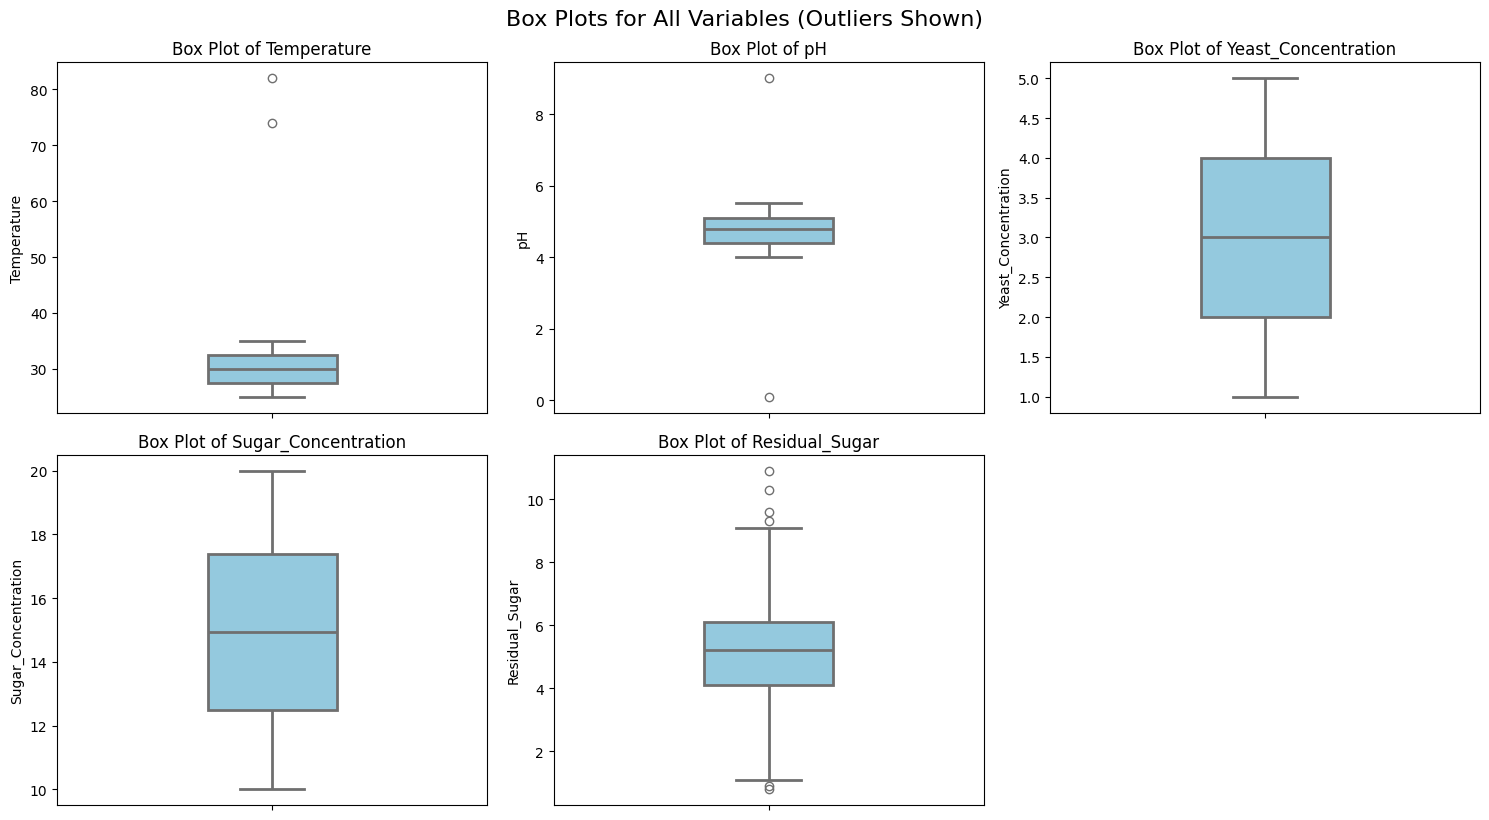

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select only numeric columns
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Set up the subplot grid (adjust layout based on number of variables)
n_cols = len(numeric_cols)
n_rows = (n_cols + 2) // 3  # Adjust rows to have up to 3 plots per row
fig, axes = plt.subplots(n_rows, 3, figsize=(15, 4 * n_rows))
axes = axes.flatten()  # Flatten in case of multiple rows

# Create a box plot for each numeric variable
for i, col in enumerate(numeric_cols):
    sns.boxplot(y=df[col], ax=axes[i], color='skyblue', fliersize=6, linewidth=2, width=.3)
    axes[i].set_title(f'Box Plot of {col}', fontsize=12)
    axes[i].set_ylabel(col, fontsize=10)

# Hide any unused subplots
for i in range(i + 1, len(axes)):
    axes[i].set_visible(False)

# Adjust layout to prevent overlap
plt.tight_layout()
plt.suptitle('Box Plots for All Variables (Outliers Shown)', fontsize=16, y=1.02)
plt.show()

### Data Visualization with Violine plot


![Violin plot](./assets/violinplot.png)


**Prompt:**

Create violine plots for all variables in multiple plots in single figure.

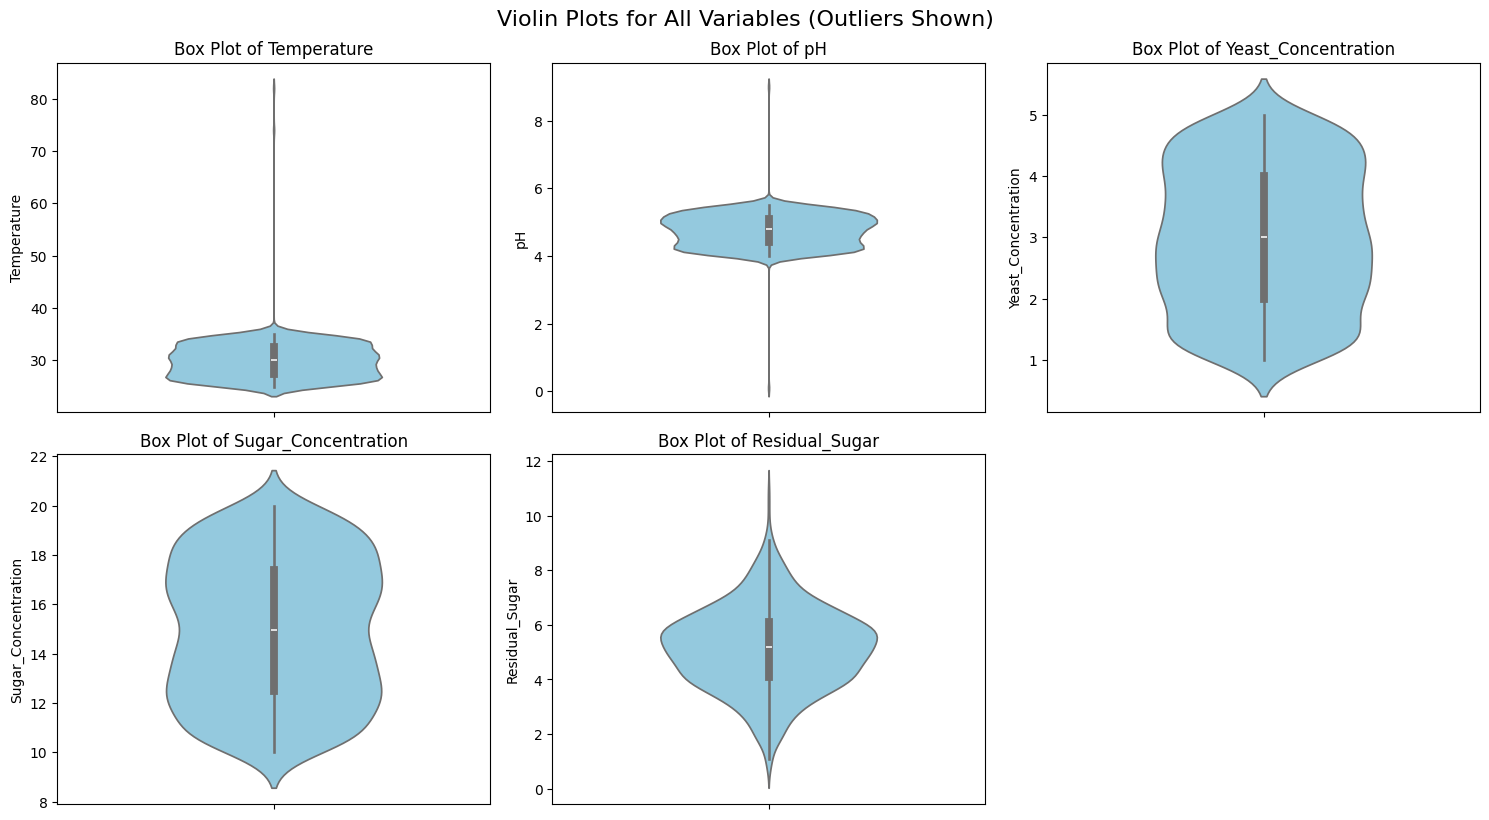

In [35]:
n_cols = len(numeric_cols)
n_rows = (n_cols + 2) // 3  # Adjust rows to have up to 3 plots per row
fig, axes = plt.subplots(n_rows, 3, figsize=(15, 4 * n_rows))
axes = axes.flatten()  # Flatten in case of multiple rows

# Create a box plot for each numeric variable
for i, col in enumerate(numeric_cols):
    sns.violinplot(y=df[col], ax=axes[i], color='skyblue', width=.5)
    axes[i].set_title(f'Box Plot of {col}', fontsize=12)
    axes[i].set_ylabel(col, fontsize=10)

# Hide any unused subplots
for i in range(i + 1, len(axes)):
    axes[i].set_visible(False)

# Adjust layout to prevent overlap
plt.tight_layout()
plt.suptitle('Violin Plots for All Variables (Outliers Shown)', fontsize=16, y=1.02)
plt.show()

### Data Visualization with Histogram plot

**Prompt:**

Create histogram plots for all variables in multiple plots in single figure.

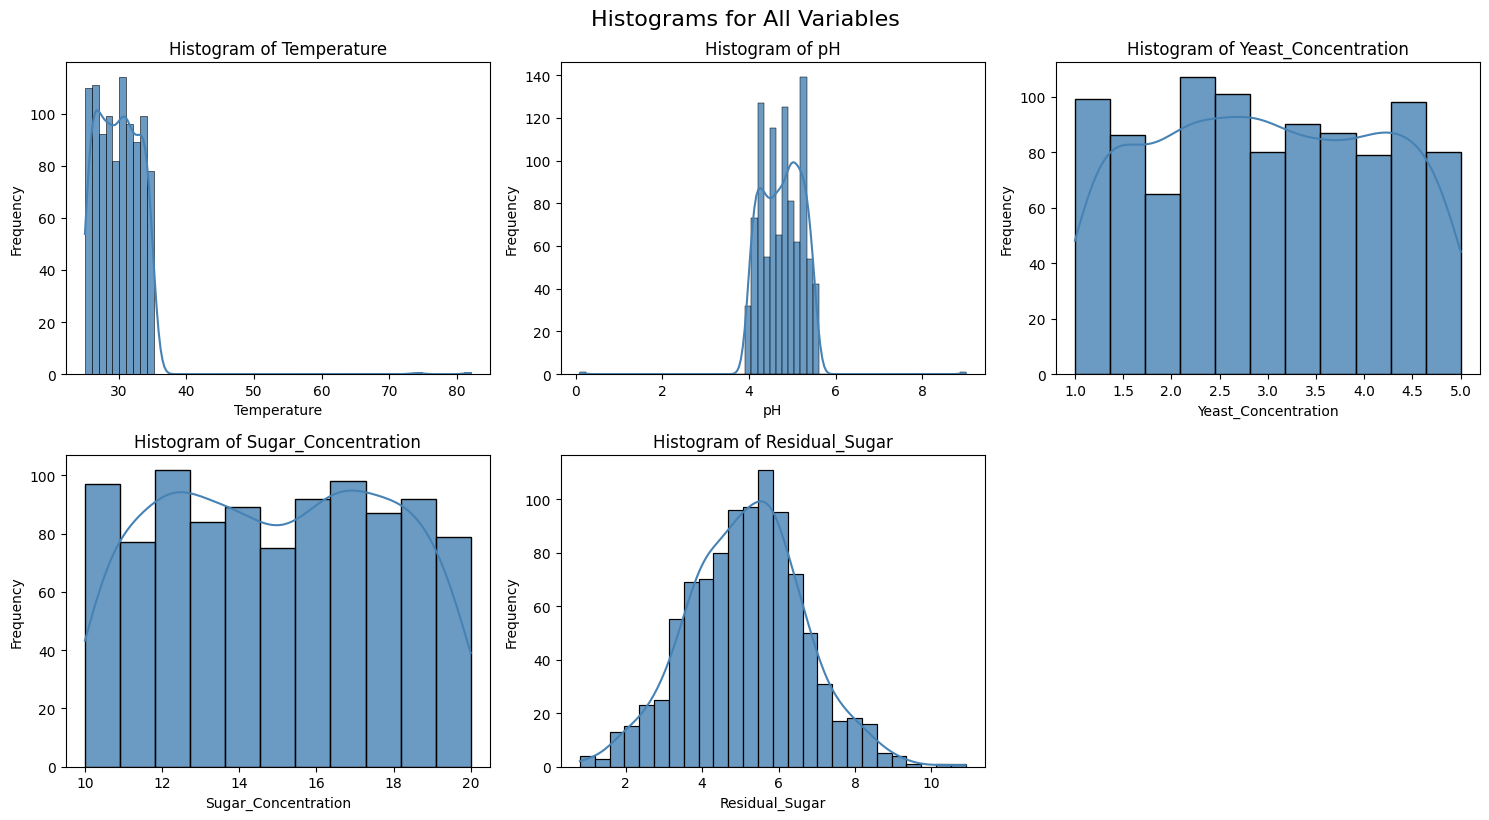

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select only numeric columns
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Set up the subplot grid (e.g., 3 plots per row)
n_cols = len(numeric_cols)
n_rows = (n_cols + 2) // 3  # Ceiling division to get number of rows
fig, axes = plt.subplots(n_rows, 3, figsize=(15, 4 * n_rows))
axes = axes.flatten()  # Flatten to make indexing easier

# Plot histogram for each numeric variable
for i, col in enumerate(numeric_cols):
    sns.histplot(df[col], ax=axes[i], kde=True, color='steelblue', alpha=0.8)
    axes[i].set_title(f'Histogram of {col}', fontsize=12)
    axes[i].set_xlabel(col, fontsize=10)
    axes[i].set_ylabel('Frequency', fontsize=10)

# Hide any unused subplots
for i in range(i + 1, len(axes)):
    axes[i].set_visible(False)

# Adjust layout to prevent overlap
plt.tight_layout()
plt.suptitle('Histograms for All Variables', fontsize=16, y=1.02)
plt.show()

## Outliers

**Strategy:** We will use statistical methods to remove outliers (IQR)

**Prompt:**

Remove all outliers of df using IQR method and create a table called dfclean

In [37]:
import numpy as np
import pandas as pd

# Step 1: Select only numeric columns from df
df_numeric = df.select_dtypes(include=[np.number])

# Step 2: Define function to remove outliers using IQR
def remove_outliers_iqr(df, factor=1.5):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - factor * IQR
    upper_bound = Q3 + factor * IQR
    # Create a mask for non-outlier values
    mask = (df >= lower_bound) & (df <= upper_bound)
    # Keep only rows where all columns are within bounds
    return df[mask.all(axis=1)]

# Step 3: Apply IQR method and create dfclean
dfclean = remove_outliers_iqr(df_numeric)

# Step 4: Optional ‚Äì Reset index for cleanliness
dfclean = dfclean.reset_index(drop=True)

# Step 5: Print summary
print(f"Original DataFrame (numeric rows): {df_numeric.shape[0]}")
print(f"Cleaned DataFrame (dfclean): {dfclean.shape[0]}")
print(f"Outliers removed: {df_numeric.shape[0] - dfclean.shape[0]} rows")
print(f"Reduction: {((df_numeric.shape[0] - dfclean.shape[0]) / df_numeric.shape[0] * 100):.2f}%")

Original DataFrame (numeric rows): 972
Cleaned DataFrame (dfclean): 964
Outliers removed: 8 rows
Reduction: 0.82%


### Histogram plot with cleaned data

**Prompt:**

Create histogram plots for all variables in multiple plots in single figure using dfclean

Text(0.5, 1.02, 'Histograms for All Variables (dfclean - Outliers Removed)')

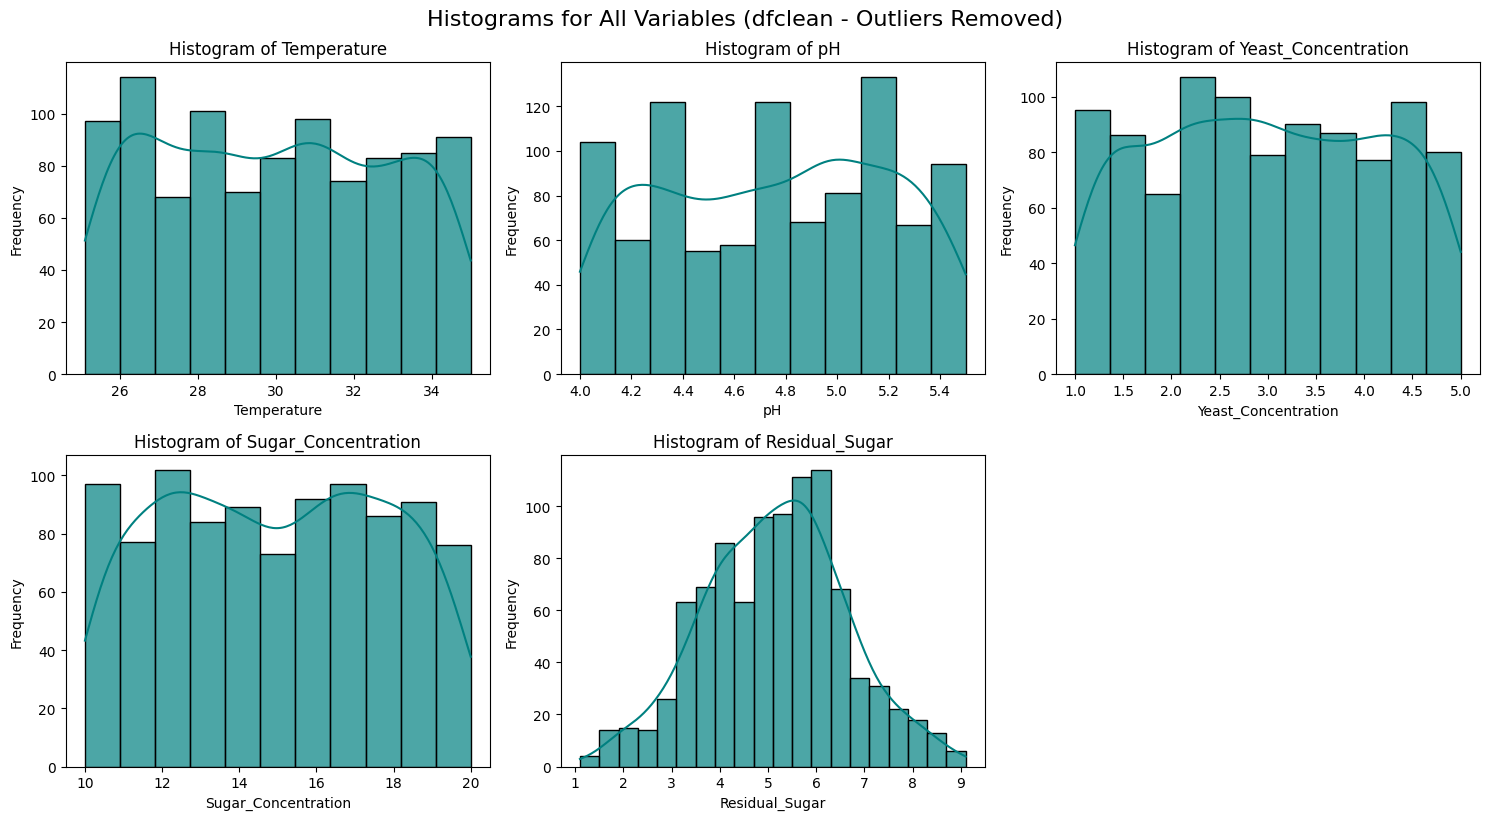

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Select only numeric columns from dfclean (safe if mixed types)
numeric_cols = dfclean.select_dtypes(include=[np.number]).columns

# Set up the subplot grid (e.g., 3 plots per row)
n_cols = len(numeric_cols)
n_rows = (n_cols + 2) // 3  # Ceiling division to determine number of rows
fig, axes = plt.subplots(n_rows, 3, figsize=(15, 4 * n_rows))
axes = axes.flatten()  # Flatten for easy indexing

# Plot histogram for each numeric column in dfclean
for i, col in enumerate(numeric_cols):
    sns.histplot(dfclean[col], ax=axes[i], kde=True, color='teal', alpha=0.7)
    axes[i].set_title(f'Histogram of {col}', fontsize=12)
    axes[i].set_xlabel(col, fontsize=10)
    axes[i].set_ylabel('Frequency', fontsize=10)

# Hide any unused subplots (if total plots > number of variables)
for i in range(i + 1, len(axes)):
    axes[i].set_visible(False)

# Adjust layout to prevent overlap
plt.tight_layout()
plt.suptitle('Histograms for All Variables (dfclean - Outliers Removed)', fontsize=16, y=1.02)

## Corelinearity

**Prompt:**

Print correlations matrix and do a plot a heatmap of correlation of dfclean

=== Correlation Matrix ===
                     Temperature        pH  Yeast_Concentration  \
Temperature             1.000000 -0.012451            -0.008779   
pH                     -0.012451  1.000000             0.015833   
Yeast_Concentration    -0.008779  0.015833             1.000000   
Sugar_Concentration    -0.014722  0.003738             0.006277   
Residual_Sugar         -0.011687 -0.026576            -0.510320   

                     Sugar_Concentration  Residual_Sugar  
Temperature                    -0.014722       -0.011687  
pH                              0.003738       -0.026576  
Yeast_Concentration             0.006277       -0.510320  
Sugar_Concentration             1.000000        0.102366  
Residual_Sugar                  0.102366        1.000000  


<Axes: >

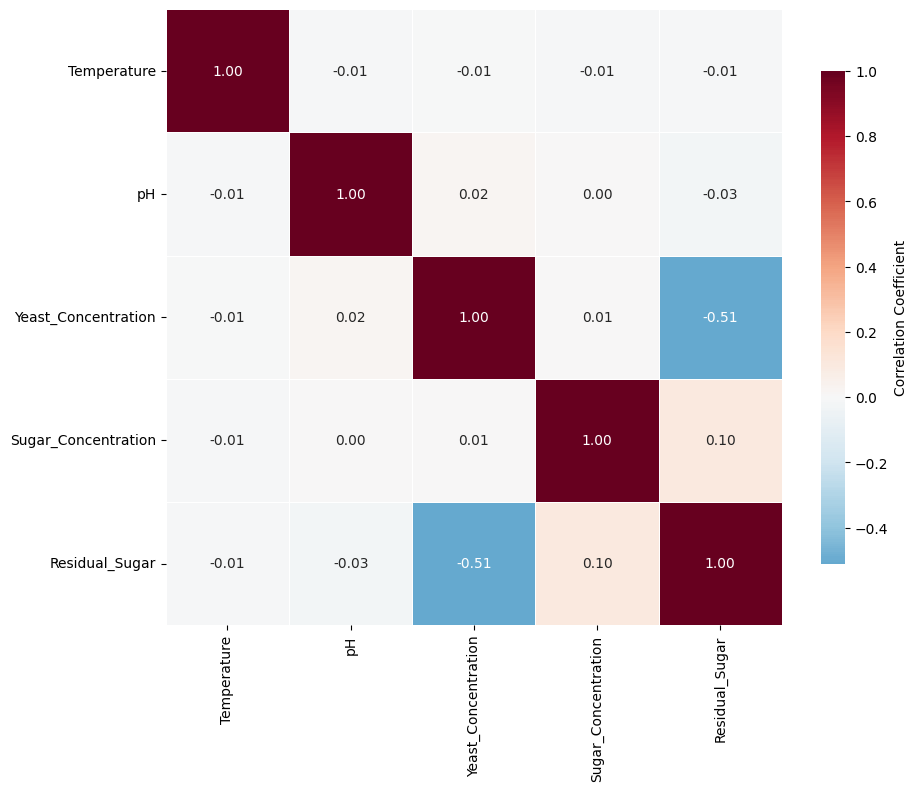

In [39]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Ensure only numeric columns are used
df_numeric = dfclean.select_dtypes(include=[float, int])

# Step 1: Compute and print the correlation matrix
print("=== Correlation Matrix ===")
correlation_matrix = df_numeric.corr()
print(correlation_matrix)

# Step 2: Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(
    correlation_matrix,
    annot=True,           # Show correlation values on the map
    cmap='RdBu_r',        # Red-Blue diverging colormap (good for -1 to 1)
    center=0,             # Center the colormap at zero
    square=True,          # Make cells appear square
    fmt='.2f',            # Format numbers to 2 decimal places
    linewidths=0.5,       # Add thin lines between cells
    cbar_kws={"shrink": 0.8, "label": "Correlation Coefficient"}
)

# Customize

# Data Prep for Model

## Define Features and Target

**Prompt:**

'Residual_Sugar' is Y variables and Temperature','pH','Yeast_Concentration','Sugar_Concentration' are features. Plot scatter plot between features and Y

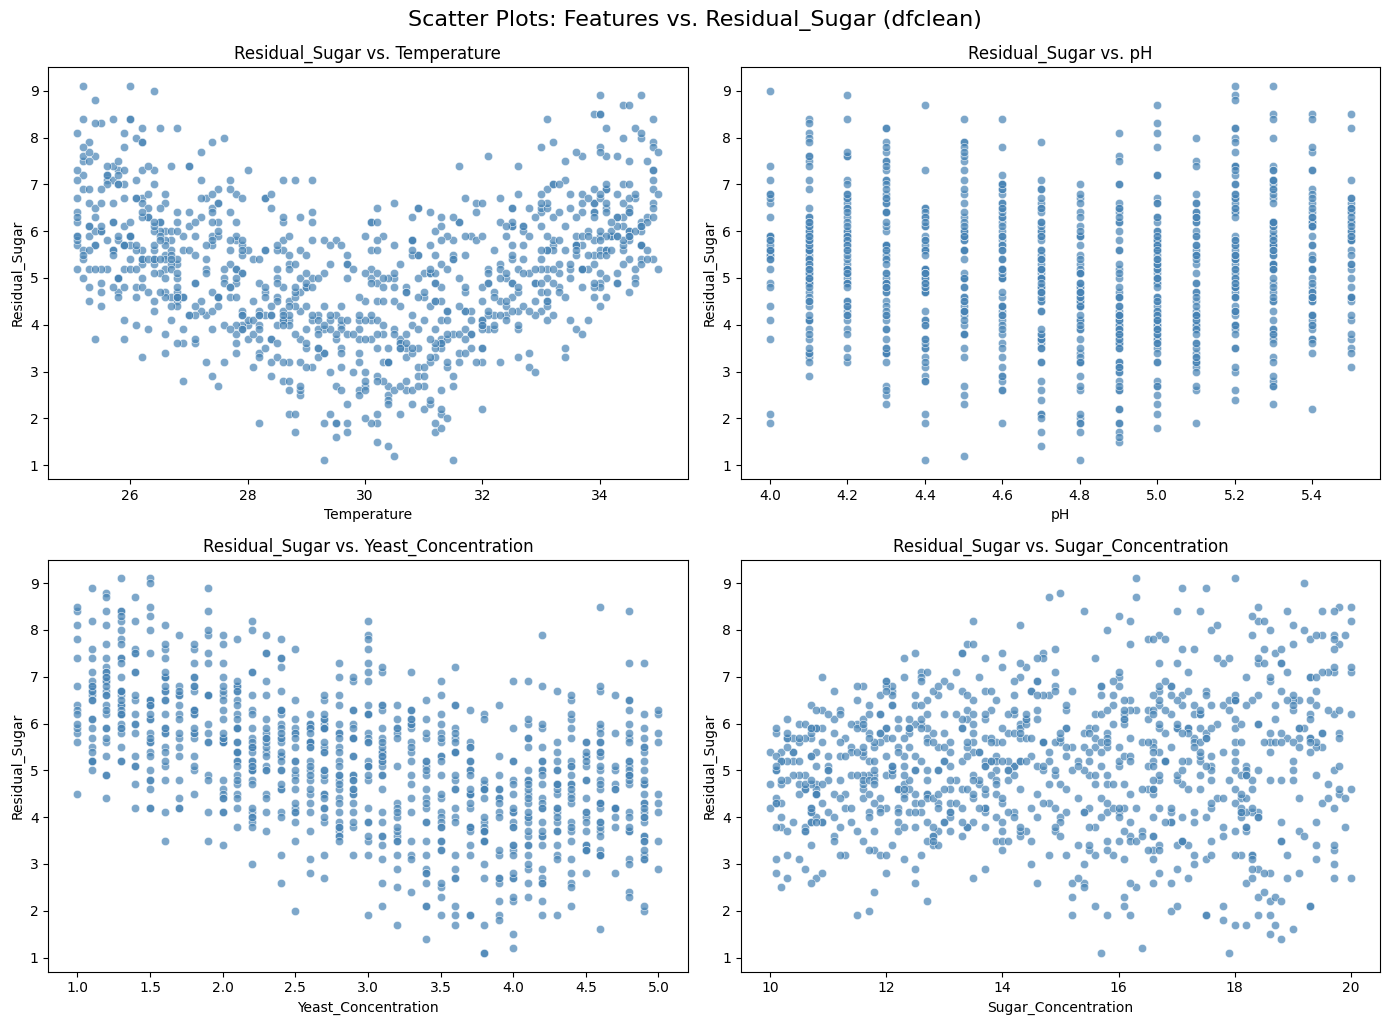

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Define features and target
features = ['Temperature', 'pH', 'Yeast_Concentration', 'Sugar_Concentration']
target = 'Residual_Sugar'

# Select data from dfclean (assumed to be your cleaned DataFrame)
df_plot = dfclean  # Ensure dfclean is defined

# Set up the subplot: 2 rows, 2 columns
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()  # Flatten for easy iteration

# Plot each feature vs. Residual_Sugar
for i, col in enumerate(features):
    sns.scatterplot(x=df_plot[col], y=df_plot[target], ax=axes[i], alpha=0.7, color='steelblue')
    axes[i].set_title(f'{target} vs. {col}', fontsize=12)
    axes[i].set_xlabel(col, fontsize=10)
    axes[i].set_ylabel(target, fontsize=10)

# Optional: Add a trend line (regression line) to each plot
# Uncomment the loop below if you want trend lines
"""
for i, col in enumerate(features):
    sns.regplot(x=df_plot[col], y=df_plot[target], ax=axes[i],
                scatter=False, color='red', line_kws={'linewidth': 1.5})
"""

# Adjust layout to prevent overlap
plt.tight_layout()
plt.suptitle('Scatter Plots: Features vs. Residual_Sugar (dfclean)', fontsize=16, y=1.02)
plt.show()

## Feature Engineering with Data Scaling

**Prompt:**

Normalize X data using StandarScaler and plot histogram

In [41]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Define features and target
features = ['Temperature', 'pH', 'Yeast_Concentration', 'Sugar_Concentration']
target = 'Residual_Sugar'

# Extract X (features) and y (target)
X = dfclean[features]
Y = dfclean[target]  # Not scaled (target)

# Initialize and apply StandardScaler (mean=0, std=1)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Convert scaled X back to a DataFrame for easier handling
X_scaled_df = pd.DataFrame(X_scaled, columns=features)

print("‚úÖ X has been normalized using StandardScaler.")
print("   Each feature now has mean ‚âà 0 and standard deviation ‚âà 1.")
print(X_scaled_df.describe())

‚úÖ X has been normalized using StandardScaler.
   Each feature now has mean ‚âà 0 and standard deviation ‚âà 1.
        Temperature            pH  Yeast_Concentration  Sugar_Concentration
count  9.640000e+02  9.640000e+02         9.640000e+02         9.640000e+02
mean   3.427410e-16 -9.379312e-16        -3.685388e-17         5.491228e-16
std    1.000519e+00  1.000519e+00         1.000519e+00         1.000519e+00
min   -1.649969e+00 -1.731078e+00        -1.717996e+00        -1.734952e+00
25%   -8.616246e-01 -8.205560e-01        -8.538888e-01        -8.567629e-01
50%    2.954690e-02  8.996600e-02         1.021870e-02        -1.370121e-02
75%    8.864426e-01  7.728575e-01         8.743262e-01         8.644881e-01
max    1.743338e+00  1.683380e+00         1.738434e+00         1.777805e+00


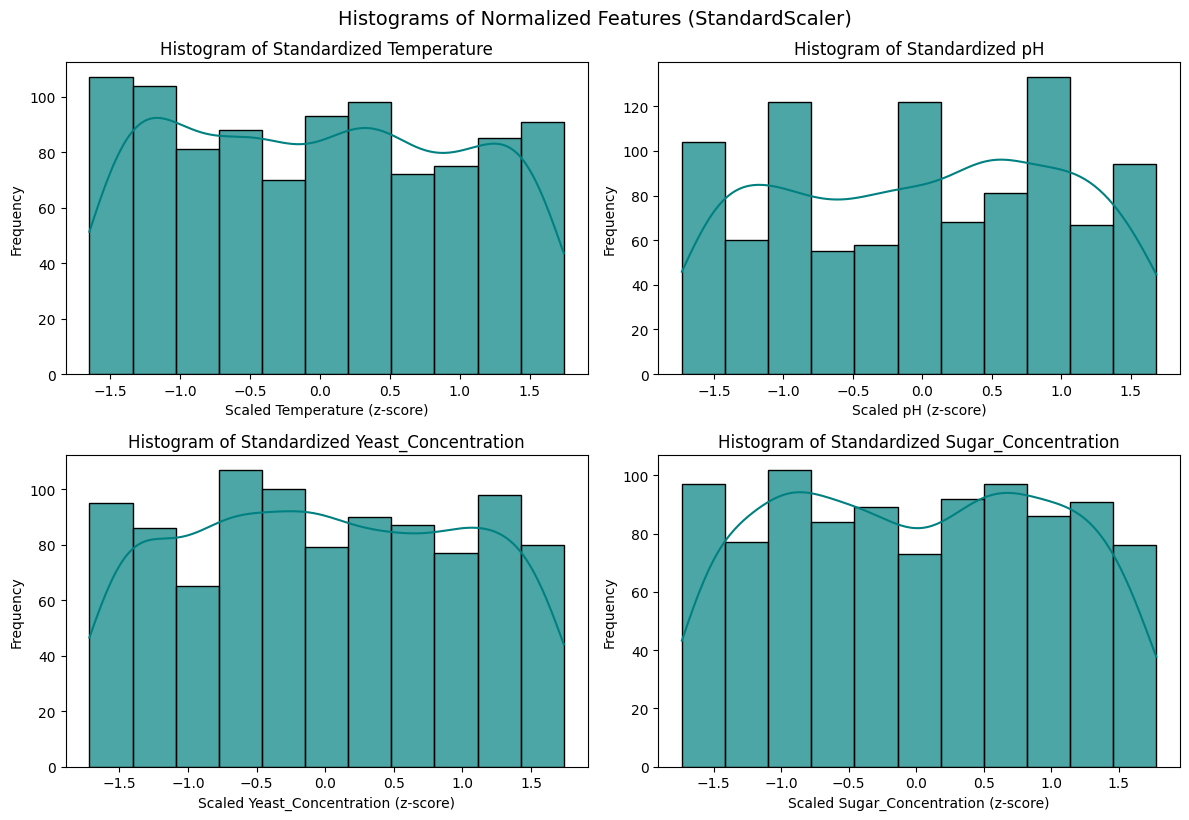

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the subplot grid (2 rows, 2 columns for 4 features)
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
axes = axes.flatten()

# Plot histogram for each normalized feature
for i, col in enumerate(features):
    sns.histplot(X_scaled_df[col], ax=axes[i], kde=True, color='teal', alpha=0.7)
    axes[i].set_title(f'Histogram of Standardized {col}')
    axes[i].set_xlabel(f'Scaled {col} (z-score)')
    axes[i].set_ylabel('Frequency')

# Hide any unused subplots (if needed)
for i in range(i + 1, len(axes)):
    axes[i].set_visible(False)

# Adjust layout
plt.tight_layout()
plt.suptitle('Histograms of Normalized Features (StandardScaler)', fontsize=14, y=1.02)
plt.show()

# Model Selection


![Model guide](./assets/model_selection.png)

# XGBoost Model


**Note:**

Since this is tree model which does not require feature scaling in general, we **will not** use scaled data for model fitting


<p style="font-size:25px; color:blue;text-align:left;">
    XGBoost
</p>



    üîò XGBoost is a machine learning algorithm that builds multiple decision trees one after another, where each new tree tries to fix the errors made by the previous trees.

    üîò It uses a method called gradient boosting, which helps improve prediction accuracy by combining many weak models into a stronger one.
    
    üîòThe algorithm includes features to prevent overfitting, such as regularization and controlling how the trees grow.

    üîò XGBoost can handle large datasets efficiently by using parallel processing to speed up training.

    üîò It is widely used because it is fast, accurate, and works well for tasks like classification and regression, making it popular among beginners and experts alike.

![xgboost](./assets/xgboost.png)

References:

[XGboost paper](https://arxiv.org/abs/1603.02754)

## Data Split

![data split](./assets/datasplit.jpg)

**Prompt**

Split the data into training and testing sets.

In [43]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

print(f"Training set size: {len(Y_train)}")
print(f"Testing set size: {len(Y_test)}")

Training set size: 674
Testing set size: 290


## Hyperparameter Optimization
| Parameter             | Purpose                              | Simple Explanation | Default |
|-----------------------|--------------------------------------|--------------------|---------|
| `n_estimators`        | Number of decision trees             | More trees = more learning, but too many can overdo it. Like having more experts vote on the answer. <br> ‚úÖ **Typical tuned range:** 100‚Äì300 | `100` |
| `max_depth`           | How deep each tree can go            | Controls complexity. Deeper = more detailed rules, but may memorize data. Like allowing more "if-then" steps. <br> ‚úÖ **Typical tuned range:** 3‚Äì10 | `6` |
| `learning_rate`       | How fast the model learns            | Smaller = slow, steady improvement. Larger = fast but may overshoot. Like step size toward the goal. <br> ‚úÖ **Typical tuned range:** 0.01 ‚Äì 0.3 | `0.3` |
| `subsample`           | % of data used for each tree         | Uses only part of the data per tree to avoid overfitting. Like asking different small groups to learn. <br> ‚úÖ **Typical tuned range:** 0.6 ‚Äì 1.0 | `1.0` |
| `colsample_bytree`    | % of features used per tree          | Each tree uses only some columns (e.g., size, age, location). Prevents over-reliance on one feature. <br> ‚úÖ **Typical tuned range:** 0.6 ‚Äì 1.0 | `1.0` |
| `min_child_weight`    | Minimum data in a prediction box     | Stops trees from splitting too small. ‚ÄúDon‚Äôt make a rule unless at least a few examples agree.‚Äù <br> ‚úÖ **Typical tuned range:** 1 ‚Äì 7 | `1` |
| `gamma`               | Minimum improvement to split         | Only split if it clearly helps. Like saying: ‚ÄúOnly add a rule if it makes things meaningfully better.‚Äù <br> ‚úÖ **Typical tuned range:** 0 ‚Äì 0.5 | `0` |
| `reg_alpha`           | Simplifies model (L1 penalty)        | Shrinks weak signals to zero. Helps when many inputs are noisy or irrelevant. <br> ‚úÖ **Typical tuned range:** 0 ‚Äì 1 | `0` |
| `reg_lambda`          | Smooths predictions (L2 penalty)     | Keeps predictions stable by avoiding extreme values. Works like a safety brake. <br> ‚úÖ **Typical tuned range:** 1 ‚Äì 2 | `1` |

### Grid Search

üîò Grid Search is like trying all possible combinations of settings to find the best one ‚Äî just like testing different oven temperatures and baking times to make the perfect cake.

üîò It automatically tests every combination of hyperparameters (like learning_rate=0.1, max_depth=6) you specify, trains the model each time, and picks the one with the best performance.

üîò It uses cross-validation (e.g., 5-fold) to ensure the result is reliable and not just lucky on one data split.

üîò Think of it as "brute-force tuning" ‚Äî thorough, systematic, and great for finding optimal settings, but can be slow with too many parameters.

*Example: If you test 5 values for max_depth, and 5 values for n_estimators, Grid Search will try all 5x5=25 combinations and tell you which works best.*
     


![grid](./assets/grid_search.png)

## K-fold Cross validation

In K-fold cross-validation, the data is split into K equal parts (folds). The model is trained K times, each time leaving out one fold for testing and using the other K-1 folds for training. The final performance metric is averaged over all K runs. This approach uses the entire dataset for both training and testing, providing a more reliable estimate of model performance.


**Prompt:**

Finetune below hyperparamters of xgboost with 5 fold cross validation. Print R2/RMSE of testing and training

```
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 6, 9],
    'learning_rate': [0.01, 0.1, 0.3],
    'subsample': [0.6, 0.8, 1.0]
}

```

## Training

In [44]:
# --- Define parameter grid ---
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 6, 9],
    'learning_rate': [0.01, 0.1, 0.3],
    'subsample': [0.6, 0.8, 1.0]
}

# --- Initialize XGBoost Regressor ---
model = XGBRegressor(random_state=42, objective='reg:squarederror')

# --- Grid Search with 5-Fold Cross Validation ---
grid_search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    cv=5,
    scoring='r2',  # We optimize for R¬≤; could also use 'neg_mean_squared_error'
    n_jobs=-1,
    verbose=1
)

# --- Fit on training data ---
grid_search.fit(X_train, Y_train)

# --- Best model and parameters ---
best_model = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)

# --- Predictions on train and test sets ---
Y_train_pred = best_model.predict(X_train)
Y_test_pred = best_model.predict(X_test)

# --- Calculate R2 and RMSE ---
r2_train = r2_score(Y_train, Y_train_pred)
r2_test = r2_score(Y_test, Y_test_pred)
rmse_train = np.sqrt(mean_squared_error(Y_train, Y_train_pred))
rmse_test = np.sqrt(mean_squared_error(Y_test, Y_test_pred))

# --- Print Results ---
print("\nPerformance Metrics:")
print(f"Training R¬≤:  {r2_train:.4f}")
print(f"Testing R¬≤:   {r2_test:.4f}")
print(f"Training RMSE: {rmse_train:.4f}")
print(f"Testing RMSE:  {rmse_test:.4f}")

Fitting 5 folds for each of 81 candidates, totalling 405 fits
Best Parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.6}

Performance Metrics:
Training R¬≤:  0.8699
Testing R¬≤:   0.8111
Training RMSE: 0.5291
Testing RMSE:  0.6399


# Model Evaluation

**Prompt:**
Evaluate the model as below.
1. Plot actual vs predicted values for both train and test
2. Print R2/RMSE on the graph
3. Plot residual for both training and testing


## Residual Plot

![residual](./assets/residualplot.png)


## Save final model

**Prompt:**

Save the model in pickle format

In [45]:
import joblib

# Save the best model
joblib.dump(best_model, 'best_xgb_model.pkl')

['best_xgb_model.pkl']

In [46]:
best_model

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.1, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=3,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=100,
             n_jobs=None, num_parallel_tree=None, ...)

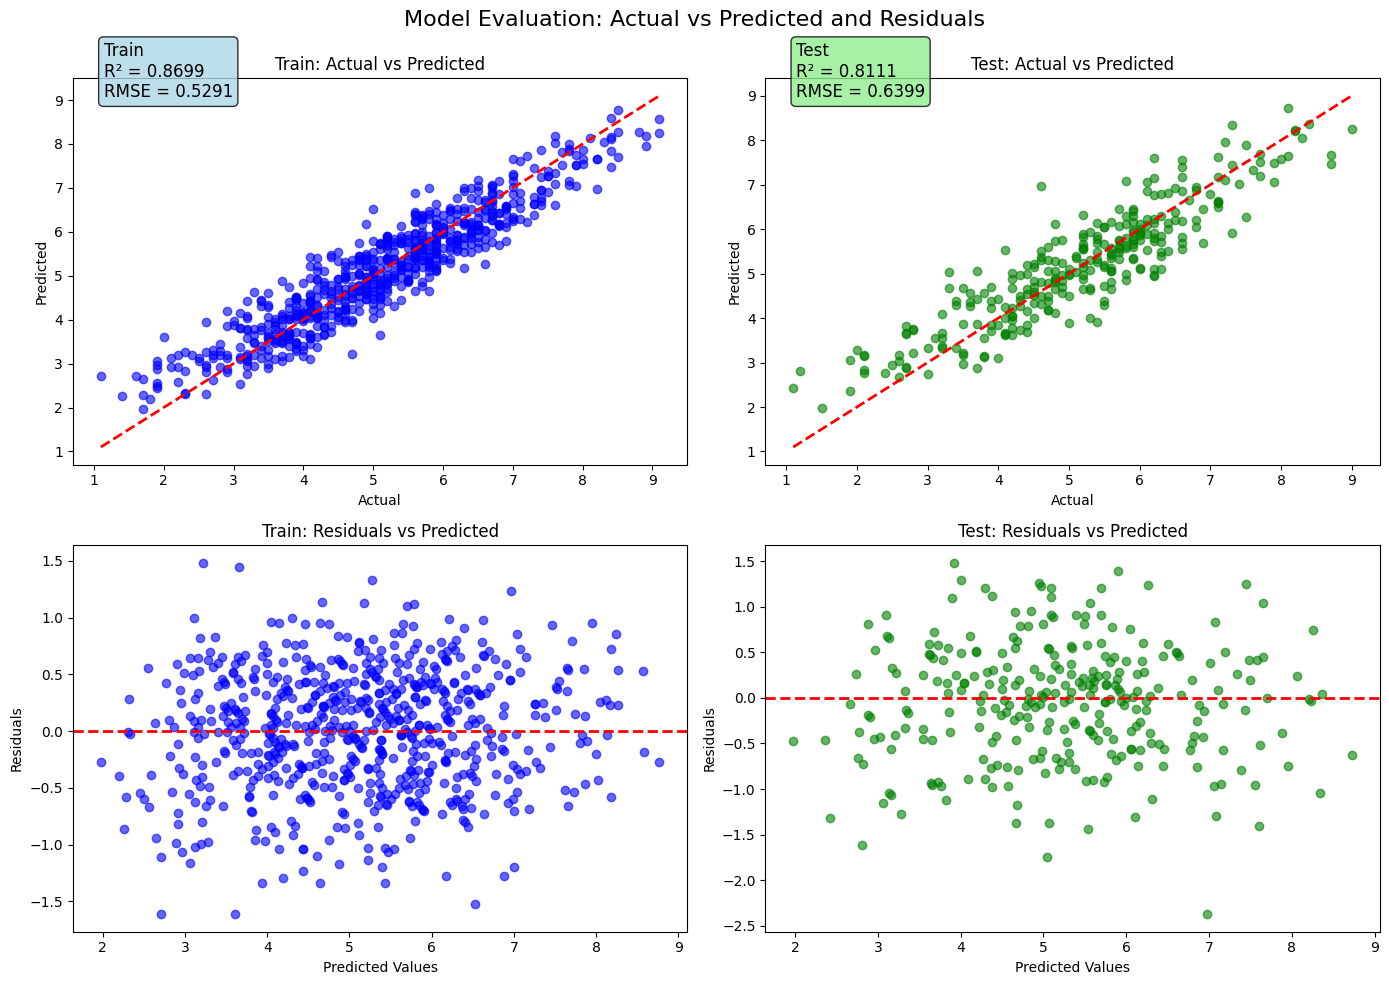

In [47]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_squared_error

# Predictions
Y_train_pred = best_model.predict(X_train)
Y_test_pred = best_model.predict(X_test)

# Metrics
r2_train = r2_score(Y_train, Y_train_pred)
r2_test = r2_score(Y_test, Y_test_pred)
rmse_train = np.sqrt(mean_squared_error(Y_train, Y_train_pred))
rmse_test = np.sqrt(mean_squared_error(Y_test, Y_test_pred))

# Create subplots: 2 rows, 2 columns
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Model Evaluation: Actual vs Predicted and Residuals', fontsize=16)

# -----------------------------------------
# 1. Actual vs Predicted (Train)
# -----------------------------------------
axes[0, 0].scatter(Y_train, Y_train_pred, alpha=0.6, color='blue')
axes[0, 0].plot([Y_train.min(), Y_train.max()], [Y_train.min(), Y_train.max()], 'r--', lw=2)
axes[0, 0].set_xlabel('Actual')
axes[0, 0].set_ylabel('Predicted')
axes[0, 0].set_title('Train: Actual vs Predicted')
# Add metrics
axes[0, 0].text(0.05, 0.95, f'Train\nR¬≤ = {r2_train:.4f}\nRMSE = {rmse_train:.4f}',
                transform=axes[0, 0].transAxes, fontsize=12,
                bbox=dict(boxstyle="round", facecolor="lightblue", alpha=0.8))

# -----------------------------------------
# 2. Actual vs Predicted (Test)
# -----------------------------------------
axes[0, 1].scatter(Y_test, Y_test_pred, alpha=0.6, color='green')
axes[0, 1].plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'r--', lw=2)
axes[0, 1].set_xlabel('Actual')
axes[0, 1].set_ylabel('Predicted')
axes[0, 1].set_title('Test: Actual vs Predicted')
# Add metrics
axes[0, 1].text(0.05, 0.95, f'Test\nR¬≤ = {r2_test:.4f}\nRMSE = {rmse_test:.4f}',
                transform=axes[0, 1].transAxes, fontsize=12,
                bbox=dict(boxstyle="round", facecolor="lightgreen", alpha=0.8))

# -----------------------------------------
# 3. Residual Plot (Train)
# -----------------------------------------
residuals_train = Y_train - Y_train_pred
axes[1, 0].scatter(Y_train_pred, residuals_train, alpha=0.6, color='blue')
axes[1, 0].axhline(y=0, color='r', linestyle='--', linewidth=2)
axes[1, 0].set_xlabel('Predicted Values')
axes[1, 0].set_ylabel('Residuals')
axes[1, 0].set_title('Train: Residuals vs Predicted')

# -----------------------------------------
# 4. Residual Plot (Test)
# -----------------------------------------
residuals_test = Y_test - Y_test_pred
axes[1, 1].scatter(Y_test_pred, residuals_test, alpha=0.6, color='green')
axes[1, 1].axhline(y=0, color='r', linestyle='--', linewidth=2)
axes[1, 1].set_xlabel('Predicted Values')
axes[1, 1].set_ylabel('Residuals')
axes[1, 1].set_title('Test: Residuals vs Predicted')

# Final layout
plt.tight_layout()
plt.show()

# Model Explanation with XAI


**SHAP (SHapley Additive exPlanations)**

![shap](./assets/shap.png)

**Prompt:**

I trained an xgboost model. Features are 'Temperature', 'pH', 'Yeast_Concentration', 'Sugar_Concentration'. Using Shap, give me the code for feature importance plot and dependency plots.

Model name: best_model, use X_train data


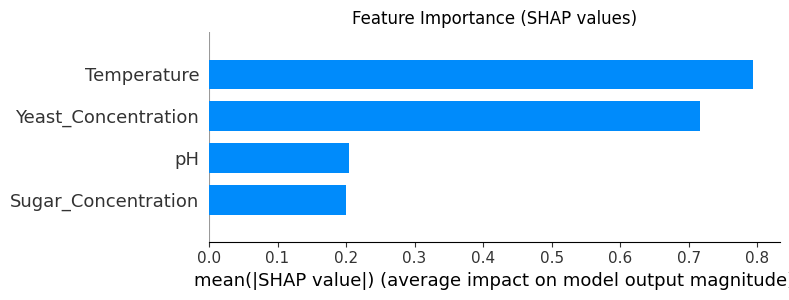

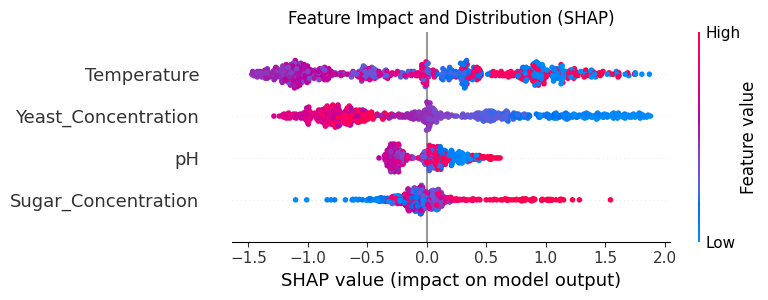

<Figure size 640x480 with 0 Axes>

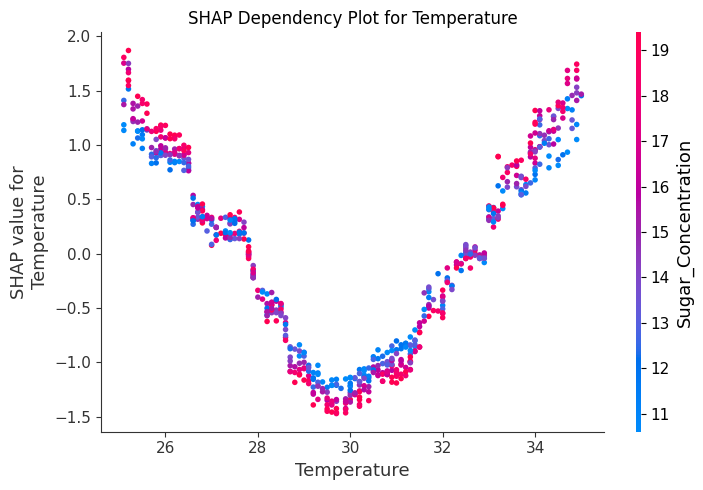

<Figure size 640x480 with 0 Axes>

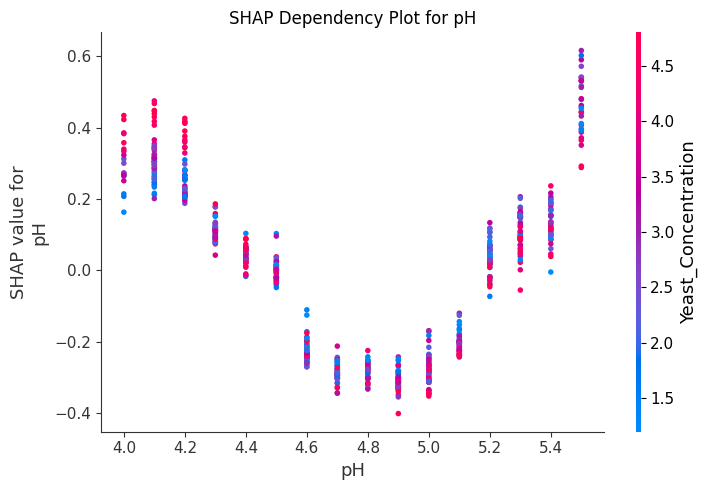

<Figure size 640x480 with 0 Axes>

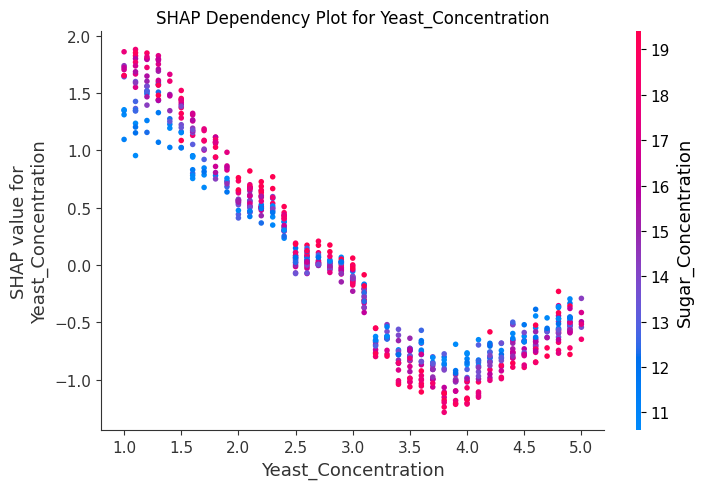

<Figure size 640x480 with 0 Axes>

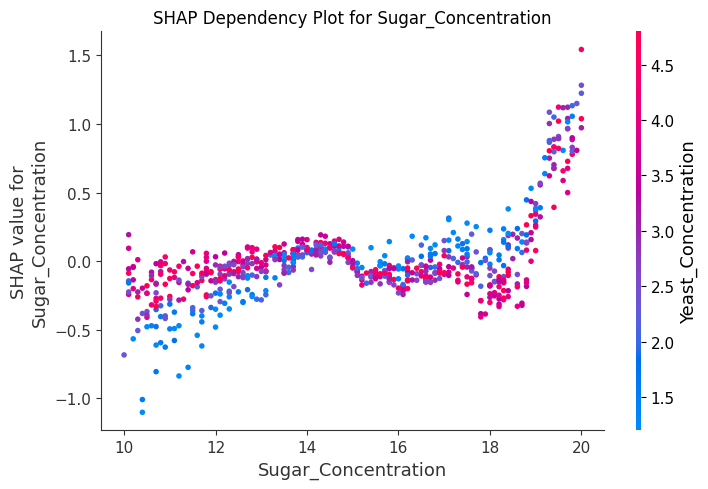

In [48]:
import shap
import matplotlib.pyplot as plt

# 1. Create SHAP explainer
explainer = shap.TreeExplainer(best_model)

# 2. Calculate SHAP values for the training data
shap_values = explainer.shap_values(X_train)

# --- FEATURE IMPORTANCE PLOT ---
plt.figure()
shap.summary_plot(shap_values, X_train, plot_type="bar", show=False)
plt.title("Feature Importance (SHAP values)")
plt.tight_layout()
plt.show()

# --- DETAILED SUMMARY PLOT ---
plt.figure()
shap.summary_plot(shap_values, X_train, show=False)
plt.title("Feature Impact and Distribution (SHAP)")
plt.tight_layout()
plt.show()

# --- DEPENDENCY PLOTS FOR EACH FEATURE ---
for feature in X_train.columns:
    plt.figure()
    shap.dependence_plot(feature, shap_values, X_train, show=False)
    plt.title(f"SHAP Dependency Plot for {feature}")
    plt.tight_layout()
    plt.show()


# Optimization

![opt](./assets/optimization.jpg)

**Stage 1 ‚Äì Wide search (cheap, covers space)**

- Coarse grid
- Random search
- Few iterations of BayesOpt

Select top candidates:
- Sort results by predicted Residual_Sugar
- Pick top N
- Ensure they are not clustered (can use a distance filter)

**Stage 2 ‚Äì Multiple BayesOpt refinements**

For each candidate:

- Define a local search box ¬±Œ¥ around its values
- Run a narrow Bayesian optimization in that box

Compare the refined minima from each candidate and pick the overall best.

**Prompt:**
Using two stage optimization (multicandidate for wide and Bayesian for narrow), find the optimum feature values to minimize target..features = ['Temperature', 'pH', 'Yeast_Concentration', 'Sugar_Concentration'] target = 'Residual_Sugar'

Parameter range:
    'Temperature': 25 to 35¬∞C
    'pH': 4.0 to 5.5
    'Yeast_Concentration': 1 to 5 g/L
    'Sugar_Concentration': 10 to 20% w/v

In [49]:
import numpy as np
import pandas as pd
from scipy.optimize import minimize
from skopt import gp_minimize
from skopt.space import Real
import random

# Define the objective function to minimize (predict Residual_Sugar)
def objective(params):
    # Map the input array of params to the feature names
    param_dict = dict(zip(features, params))
    # Convert to DataFrame with the correct column order
    input_df = pd.DataFrame([param_dict], columns=features)
    # Predict using the trained model
    prediction = best_model.predict(input_df)[0]
    return prediction

# Define the parameter ranges for the optimization
param_ranges = {
    'Temperature': (25.0, 35.0),
    'pH': (4.0, 5.5),
    'Yeast_Concentration': (1.0, 5.0),
    'Sugar_Concentration': (10.0, 20.0)
}

# Extract the feature names in the correct order
features = ['Temperature', 'pH', 'Yeast_Concentration', 'Sugar_Concentration']

# --- Stage 1: Wide Search (Multicandidate) ---
# Generate a number of random candidates within the defined ranges
num_candidates = 50  # You can adjust this number
candidates = []
for _ in range(num_candidates):
    candidate = [random.uniform(param_ranges[feature][0], param_ranges[feature][1]) for feature in features]
    candidates.append(candidate)

# Evaluate the objective function for each candidate
candidate_results = []
for candidate in candidates:
    result = objective(candidate)
    candidate_results.append((result, candidate))

# Sort candidates by their predicted Residual_Sugar and select top N
candidate_results.sort(key=lambda x: x[0])
top_n_candidates = candidate_results[:10] # Select top 10 candidates for refinement

print("--- Stage 1: Wide Search ---")
print("Top candidates for minimization (Predicted Residual_Sugar, Parameters):")
for res, params in top_n_candidates:
    print(f"Predicted Residual_Sugar: {res:.4f}, Parameters: {params}")

# --- Stage 2: Multiple BayesOpt Refinements ---
print("\n--- Stage 2: Bayesian Optimization Refinement ---")

best_overall_result = float('inf')
best_overall_params = None

# Define the search space for Bayesian Optimization
# Need to convert the ranges from the dictionary to a list of skopt.space.Real objects
search_space = [Real(param_ranges[feature][0], param_ranges[feature][1], name=feature) for feature in features]

for i, (initial_res, initial_params) in enumerate(top_n_candidates):
    print(f"\nRefining candidate {i+1}/{len(top_n_candidates)} with initial params: {initial_params}")

    # Run Bayesian Optimization starting near the initial_params
    # We use the overall search space, but gp_minimize explores based on initial points
    res_gp = gp_minimize(
        objective,         # the function to minimize
        search_space,      # the search space
        x0=initial_params, # initial points
        n_calls=50,        # number of calls to the objective function per refinement
        random_state=42 + i, # different random state for each refinement
        verbose=False      # set to True to see optimization progress
    )

    print(f"Refinement {i+1} best result: {res_gp.fun:.4f} at parameters: {res_gp.x}")

    # Update overall best if this refinement yielded a better result
    if res_gp.fun < best_overall_result:
        best_overall_result = res_gp.fun
        best_overall_params = res_gp.x

print("\n--- Optimization Complete ---")
print(f"Overall Best Predicted Residual_Sugar: {best_overall_result:.4f}")
print(f"Optimal Parameters: Temperature={best_overall_params[0]:.2f}, pH={best_overall_params[1]:.2f}, Yeast_Concentration={best_overall_params[2]:.2f}, Sugar_Concentration={best_overall_params[3]:.2f}")

--- Stage 1: Wide Search ---
Top candidates for minimization (Predicted Residual_Sugar, Parameters):
Predicted Residual_Sugar: 2.2864, Parameters: [30.00114959992116, 5.035712950924456, 3.8268091461170743, 15.975388949042628]
Predicted Residual_Sugar: 2.9796, Parameters: [29.726701509332933, 5.06738599062939, 4.711813920499203, 14.546295635854062]
Predicted Residual_Sugar: 3.0974, Parameters: [29.065553108108688, 4.807231872216937, 4.061761605705625, 14.3489654544357]
Predicted Residual_Sugar: 3.1901, Parameters: [30.759720398673494, 5.0281172300801185, 4.513316609076268, 11.759399337667148]
Predicted Residual_Sugar: 3.3153, Parameters: [28.724368553897076, 4.196068201425698, 3.8871319237238917, 15.777521741514754]
Predicted Residual_Sugar: 3.3307, Parameters: [28.653986645787917, 5.017198987196823, 4.426559042882211, 10.446530146211979]
Predicted Residual_Sugar: 3.3355, Parameters: [30.208458253574502, 5.2538434000300205, 3.249707521625094, 14.355559304650962]
Predicted Residual_Sugar

In [50]:
%pip install scikit-optimize